Enter total number of domain steps:   20


number of steps and H are 20 0.05


Enter total time:  0.045


We recommend a time step as 0.5*h^2 such as 0.001250


Enter time step (0 to stop):  0.001


time step and time are: 0.001 0.045


<Figure size 432x288 with 0 Axes>

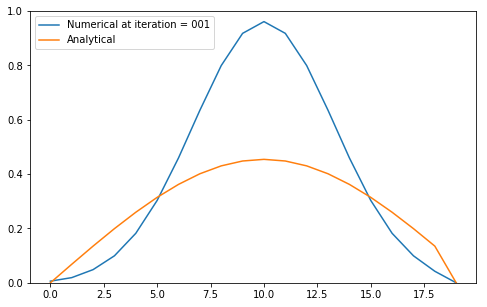

<Figure size 432x288 with 0 Axes>

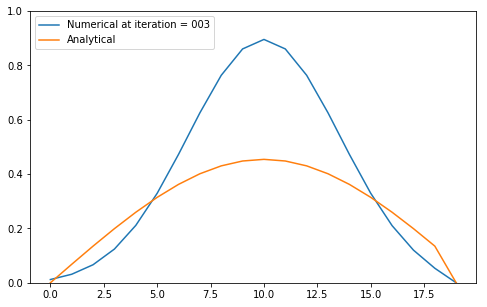

<Figure size 432x288 with 0 Axes>

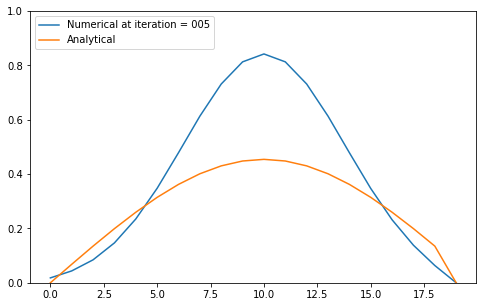

<Figure size 432x288 with 0 Axes>

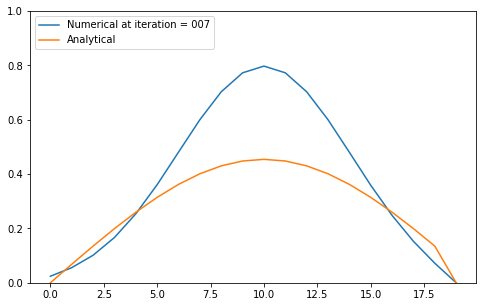

<Figure size 432x288 with 0 Axes>

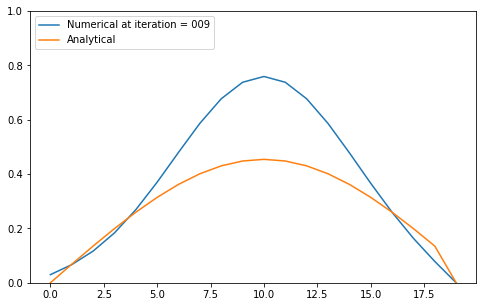

<Figure size 432x288 with 0 Axes>

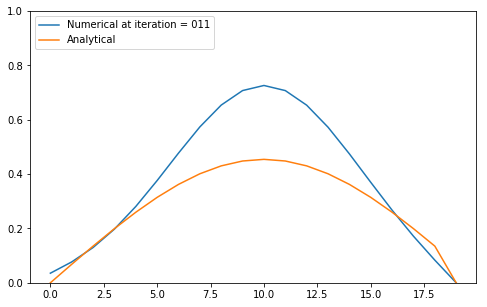

<Figure size 432x288 with 0 Axes>

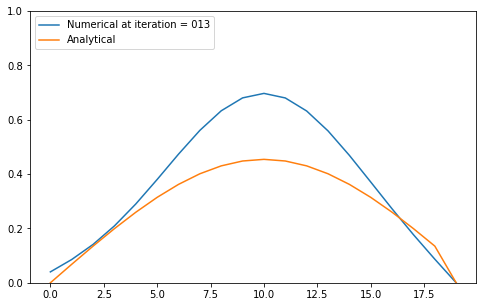

<Figure size 432x288 with 0 Axes>

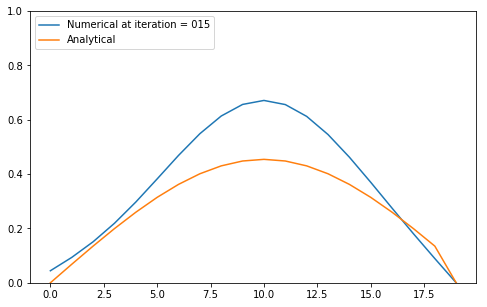

<Figure size 432x288 with 0 Axes>

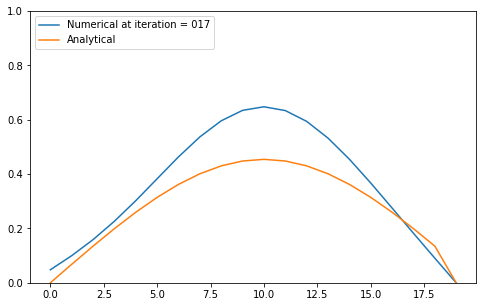

<Figure size 432x288 with 0 Axes>

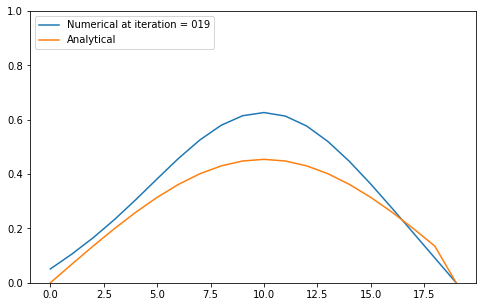

<Figure size 432x288 with 0 Axes>

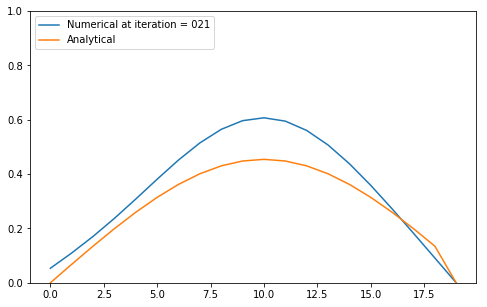

<Figure size 432x288 with 0 Axes>

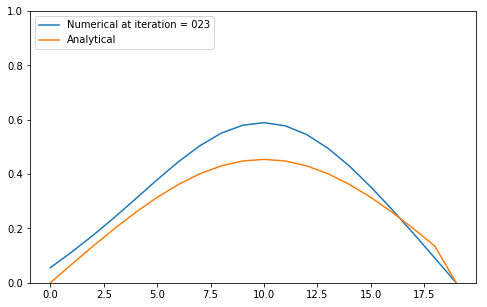

<Figure size 432x288 with 0 Axes>

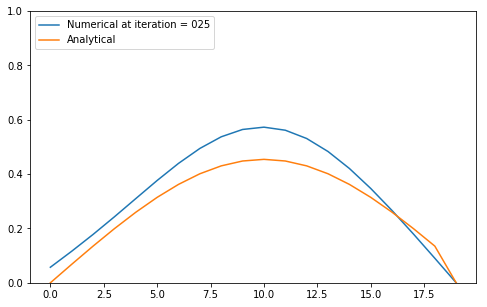

<Figure size 432x288 with 0 Axes>

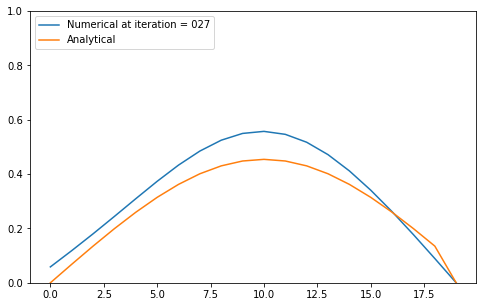

<Figure size 432x288 with 0 Axes>

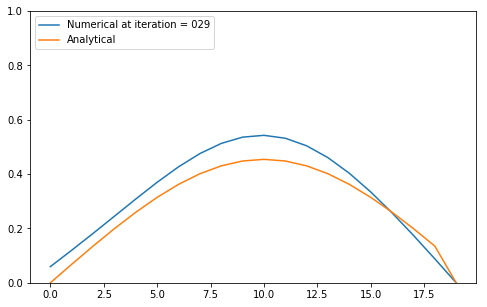

<Figure size 432x288 with 0 Axes>

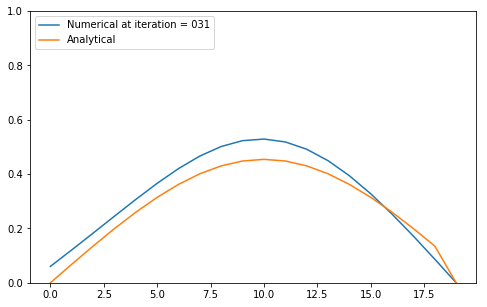

<Figure size 432x288 with 0 Axes>

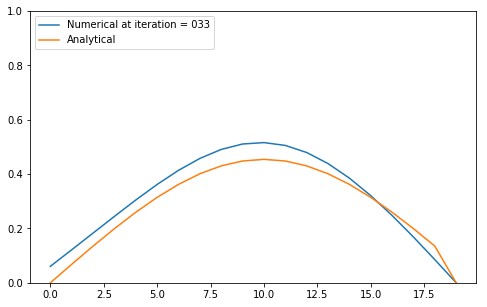

<Figure size 432x288 with 0 Axes>

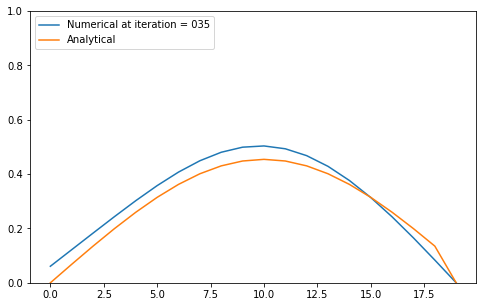

<Figure size 432x288 with 0 Axes>

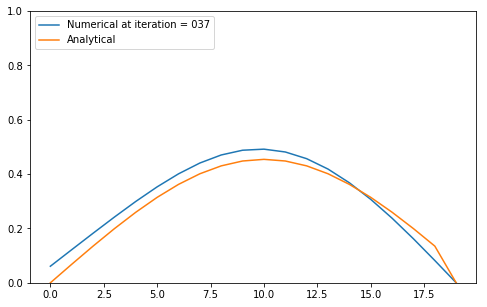

<Figure size 432x288 with 0 Axes>

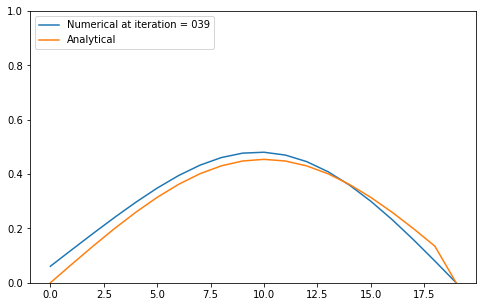

<Figure size 432x288 with 0 Axes>

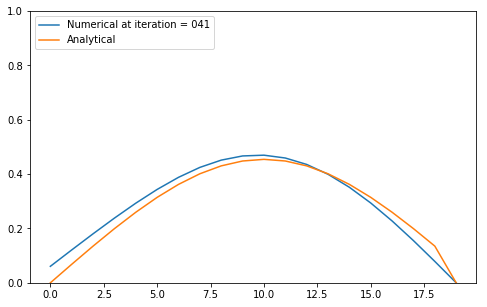

<Figure size 432x288 with 0 Axes>

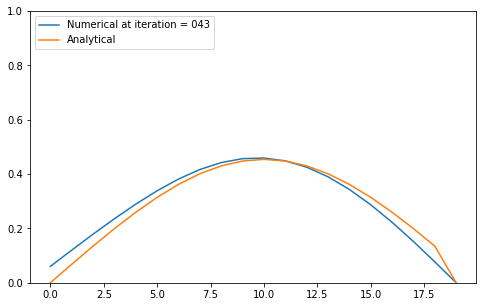

<Figure size 432x288 with 0 Axes>

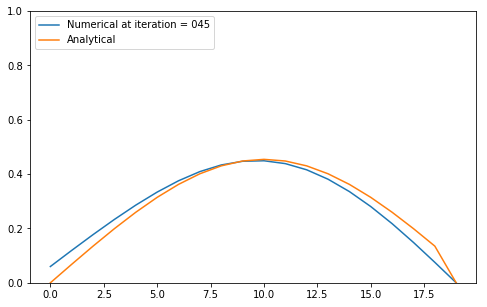

In [2]:
import matplotlib.pyplot as plt
import cmath, math
import numpy as np
import os
from matplotlib.animation import FuncAnimation

NSTEP = input("Enter total number of domain steps:  ")  # Total number of domain steps 
NSTEP = int(NSTEP)
H = 1.0/NSTEP             # Spacing
phi = np.zeros(NSTEP)     # Space of PHI
diff = np.zeros(NSTEP)    # Space of Error
exactsol = np.zeros(NSTEP)

print("number of steps and H are", NSTEP, H)

### Function Arrangement
def gauss(x,t):
    return math.exp(-20.0 * (x-0.5)**2/(1.0+80*t))/math.sqrt(1.0+80*t)

def exact(x,t):
    return gauss(x,t) - gauss(x-1.0,t) - gauss(x+1.0,t)

### Calculation
time = input("Enter total time: ")
print("We recommend a time step as 0.5*h^2 such as %8.6f" % (0.5*(H**2)))
dt = input("Enter time step (0 to stop): ")
print("time step and time are:", dt, time)

dt = float(dt); time = float(time)

if dt == 0:
    print("dt is zero and program is stopping")
    quit()

NITER=int(time/dt)
dth=dt/H**2
t=0; phi[0]=0 ; phi[NSTEP-1]=0

for i in range(0, NSTEP-1):
    phi[i]=exact(i*H, t)

for i in range(0,NITER):
    pold=0
    for j in range(0, NSTEP-1):
        pnew=phi[j] + dth*(pold + phi[j+1] - 2*phi[j])
        pold=phi[j]
        phi[j]=pnew
        exactsol[j] = exact(j*H,time)
    if i % 2 == 0:
        plt.clf()
        fig = plt.figure(figsize=(8,5))
        plot1 = plt.plot(range(0,NSTEP), phi, label="Numerical at iteration = %03d" % (i+1))
        plot2 = plt.plot(range(0,NSTEP), exactsol, label="Analytical")
        plt.ylim(0,1)
        plt.legend(loc=2)
        plt.show()
